In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取 w-petroprice 石油价格
raw_data = []
with open("../ftsdata/q-ko-earns8309.txt", "r", encoding="utf-8") as file:
    for line in file.readlines():
        line = line.strip("\n").strip(" ").replace("\t", " ").split(" ")
        line = list(filter(lambda x: x != "", line))
        raw_data.append(line)
data = pd.DataFrame(raw_data[1:], columns=raw_data[0])


# 处理数据格式
data["pends"] = pd.to_datetime(data["pends"], format="%Y%m%d")
data["anntime"] = pd.to_datetime(data["anntime"], format="%Y%m%d")
data["value"] = pd.to_numeric(data["value"])
data.head()

In [ ]:
import plotly.graph_objects as go

# 假设 ko_Rqtr 已经是 DataFrame，且索引为日期
fig = go.Figure()
# 添加线条图
fig.add_trace(go.Scatter(x=data["pends"], y=data['value'], mode='lines', name='Coca Kola Quarterly Return'))

# 设置图表标题和标签
fig.update_layout(title='Coca Kola Quarterly Return', xaxis_title='Date', yaxis_title='Value')

# 显示图表
fig.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


cola = pd.DataFrame(data[["pends", "value"]])
plt.figure(figsize=(12, 6))
plt.plot(cola["pends"], cola['value'], label='Coca Kola Quarterly Return', color='green')
plt.title('Coca Kola Quarterly Return', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
# plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
# plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: pd.to_datetime(x).year))
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
cola.head()

In [ ]:
data['Date'] = pd.to_datetime(data['pends'])
data.set_index('Date', inplace=True)

# 计算年份和季度
data['Year'] = data.index.year
data['Quarter'] = data.index.quarter

# 定义季度对应的颜色
cpal = ['green', 'red', 'yellow', 'black']

# 绘制季度返回图
plt.figure(figsize=(6, 6))

# 绘制线图
plt.plot(data.index, data['value'], label='Coca Kola Quarterly Return', color='gray')

# 添加季度的散点图
for i, row in data.iterrows():
    plt.scatter(row.name, row['value'], color=cpal[row['Quarter'] - 1], s=50)

plt.title('Coca Kola Quarterly Return', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Return', fontsize=14)
plt.grid(True)

# 添加图例
quarter_labels = ['Spring', 'Summer', 'Autumn', 'Winter']
plt.legend([plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cpal[i], markersize=10) for i in range(4)],
           quarter_labels,
           title='Quarter')

plt.show()

### 标普500指数月对数收益率

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

raw_data = []
with open("../ftsdata/m-ibmsp-2611.txt", "r", encoding="utf-8") as file:
    for line in file.readlines():
        line = line.strip("\n").strip(" ").replace("\t", " ").split(" ")
        line = list(filter(lambda x: x != "", line))
        raw_data.append(line)
data = pd.DataFrame(raw_data[1:], columns=raw_data[0])


# 处理数据格式
data["date"] = pd.to_datetime(data["date"], format="%Y%m%d")
data["ibm"] = pd.to_numeric(data["ibm"])
data["sp"] = pd.to_numeric(data["sp"])
data.head()

,date,ibm,sp
0,1926-01-30,-0.010381,0.022472
1,1926-02-27,-0.024476,-0.043956
2,1926-03-31,-0.115591,-0.059113
3,1926-04-30,0.089783,0.022688
4,1926-05-28,0.036932,0.007679


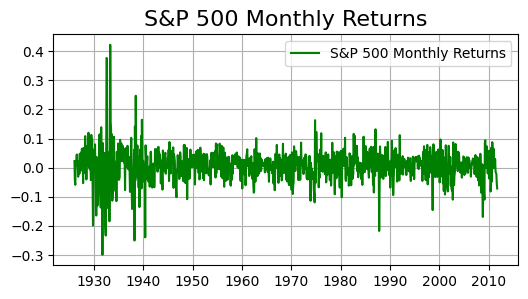

In [2]:
# cola = pd.DataFrame(data[["pends", "value"]])
plt.figure(figsize=(6, 3))
plt.plot(data["date"], data['sp'], label='S&P 500 Monthly Returns', color='green')
plt.title('S&P 500 Monthly Returns', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()


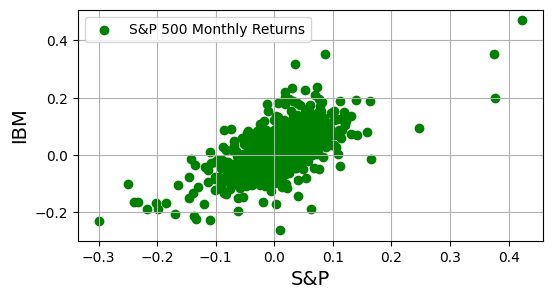

In [6]:
plt.figure(figsize=(6, 3))
plt.scatter(data["sp"], data['ibm'], label='S&P 500 Monthly Returns', color='green')
plt.xlabel("S&P", fontsize=14)
plt.ylabel("IBM", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [2]:
pearson_corr = data['ibm'].corr(data['sp'])
spearman_corr = data['ibm'].corr(data['sp'], method='spearman')
kendall_corr = data['ibm'].corr(data['sp'], method='kendall')

print("Pearson correlation:", pearson_corr)
print("Spearman correlation:", spearman_corr)
print("Kendall correlation:", kendall_corr)

Pearson correlation: 0.6395978546773113
Spearman correlation: 0.6065788974589758
Kendall correlation: 0.4328065703413303


### CRSP的第10分位组合的月对数收益率

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

raw_data = []
with open("../ftsdata/m-dec12910.txt", "r", encoding="utf-8") as file:
    for line in file.readlines():
        line = line.strip("\n").strip(" ").replace("\t", " ").split(" ")
        line = list(filter(lambda x: x != "", line))
        raw_data.append(line)
data = pd.DataFrame(raw_data[1:], columns=raw_data[0])

data["date"] = pd.to_datetime(data["date"], format="%Y%m%d")
data.set_index("date", inplace=True)
data = data.apply(pd.to_numeric)
data.head()

,dec1,dec2,dec9,dec10
date,,,,
1967-01-31,0.068568,0.080373,0.180843,0.211806
1967-02-28,0.008735,0.011044,0.048767,0.064911
1967-03-31,0.039698,0.035364,0.067494,0.068904
1967-04-28,0.044030,0.037541,0.040785,0.044602
1967-05-31,-0.050631,-0.036233,-0.002191,0.000295


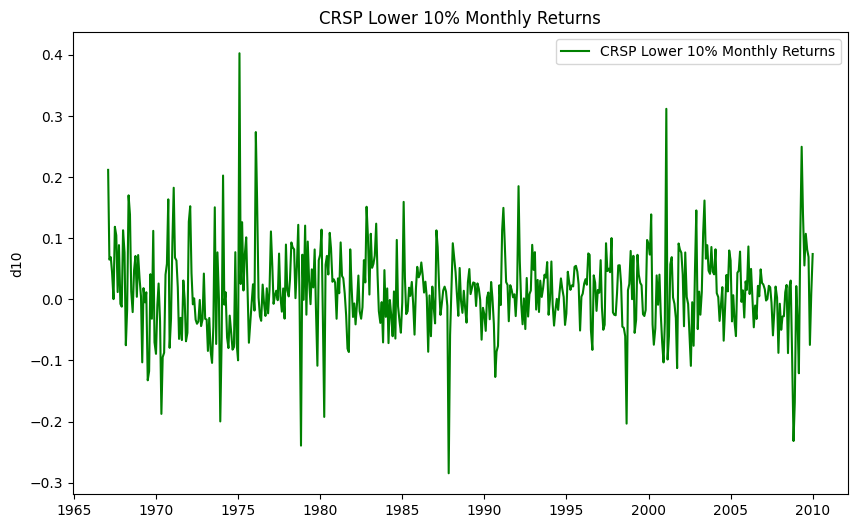

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(data["dec10"], label='CRSP Lower 10% Monthly Returns', color="green")
plt.title('CRSP Lower 10% Monthly Returns')
plt.ylabel('d10')
plt.legend()
plt.show()

<Figure size 800x400 with 0 Axes>

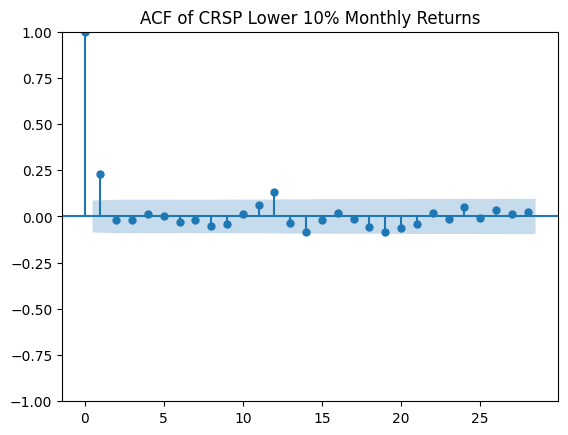

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(8, 4))
plot_acf(data["dec10"])
plt.title('ACF of CRSP Lower 10% Monthly Returns')
plt.show()

### IBM 股票从 1926-01 到 2011-09 的月度收益率

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

raw_data = []
with open("../ftsdata/m-ibmsp-2611.txt", "r", encoding="utf-8") as file:
    for line in file.readlines():
        line = line.strip("\n").strip(" ").replace("\t", " ").split(" ")
        line = list(filter(lambda x: x != "", line))
        raw_data.append(line)
data = pd.DataFrame(raw_data[1:], columns=raw_data[0])

data["date"] = pd.to_datetime(data["date"], format="%Y%m%d")
data.set_index("date", inplace=True)
data = data.apply(pd.to_numeric)
data.head()

,ibm,sp
date,,
1926-01-30,-0.010381,0.022472
1926-02-27,-0.024476,-0.043956
1926-03-31,-0.115591,-0.059113
1926-04-30,0.089783,0.022688
1926-05-28,0.036932,0.007679


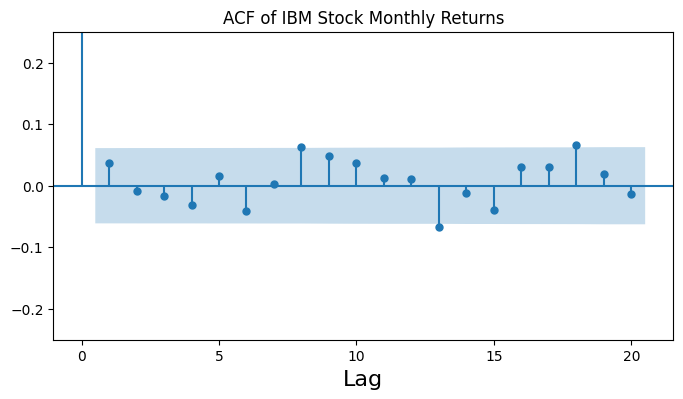

In [2]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(8, 4))
ax = plt.gca()  # 获取当前的轴对象
plot_acf(data["ibm"], ax=ax, lags=20)
ax.set_ylim(-0.25, 0.25)
ax.set_xlabel('Lag', fontsize=16)  # 设置横轴标签
plt.title('ACF of IBM Stock Monthly Returns')
plt.show()

In [3]:
from statsmodels.stats.diagnostic import acorr_ljungbox


# 执行 Ljung-Box 白噪声检验
lb_test_12 = acorr_ljungbox(data["ibm"], lags=[12], return_df=True)
print(lb_test_12)

lb_test_24 = acorr_ljungbox(data["ibm"], lags=[24], return_df=True)
print(lb_test_24)

      lb_stat  lb_pvalue
12  13.097984   0.361959
      lb_stat  lb_pvalue
24  35.384127   0.062905


In [6]:
# 执行 Ljung-Box 白噪声检验
lb_test_12 = acorr_ljungbox(np.log(data["ibm"] + 1), lags=[12], return_df=True)
print(lb_test_12)

lb_test_24 = acorr_ljungbox(np.log(data["ibm"] + 1), lags=[24], return_df=True)
print(lb_test_24)

      lb_stat  lb_pvalue
12  12.814366   0.382677
      lb_stat  lb_pvalue
24  34.505798   0.076073
